In [17]:
import pandas as pd

In [18]:
run_times = pd.read_excel("./Data/Run Times.xlsx")

In [19]:
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [20]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                     object
dtype: object

In [21]:
run_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          5 non-null      object        
 1   Run Time      5 non-null      float64       
 2   Warm Up Time  5 non-null      object        
 3   Location      5 non-null      object        
 4   Run Date      5 non-null      datetime64[ns]
 5   Race Date     5 non-null      datetime64[ns]
 6   Rain          5 non-null      bool          
 7   Fee           5 non-null      object        
dtypes: bool(1), datetime64[ns](2), float64(1), object(4)
memory usage: 417.0+ bytes


In [22]:
run_times.Fee = pd.to_numeric(run_times.Fee.str.replace("$",''))

In [23]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                    float64
dtype: object

In [24]:
pd.to_numeric(run_times['Warm Up Time'],errors='coerce')

0    3.5
1    3.5
2    NaN
3    2.2
4    2.0
Name: Warm Up Time, dtype: float64

In [25]:
run_times['Warm Up Time']

0      3.5
1      3.5
2    3 min
3      2.2
4        2
Name: Warm Up Time, dtype: object

In [26]:
run_times['Warm Up Time'] = pd.to_numeric(run_times['Warm Up Time'].astype('str').str.replace('min',''))

In [27]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time           float64
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                    float64
dtype: object

In [28]:
run_times.head()

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3.0,“the gym”,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2.0,“gym”,2023-05-10 16:30:00,2023-06-15,False,2.5


In [29]:
run_times['Rain'].astype(int)

0    0
1    1
2    0
3    0
4    0
Name: Rain, dtype: int64

**Missing Data**

In [30]:
df = pd.read_excel("./Data/Student Grades.xlsx")
df.shape

(86, 4)

In [31]:
df.tail()

,Student,Class,Year,Grade
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [32]:
np.NaN

NameError: name 'np' is not defined

In [33]:
import numpy as np

In [34]:
np.nan

nan

In [35]:
pd.NA

<NA>

In [36]:
None

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  84 non-null     object 
 1   Class    83 non-null     object 
 2   Year     80 non-null     object 
 3   Grade    82 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.8+ KB


In [38]:
df.Year.value_counts(dropna=False)

Year
Freshman     35
Sophomore    24
Junior       20
NaN           6
Senior        1
Name: count, dtype: int64

In [39]:
df.isna()

,Student,Class,Year,Grade
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
81,True,True,True,True
82,False,True,True,True
83,True,False,False,False
84,False,False,False,True


In [40]:
df.isna().sum()

Student    2
Class      3
Year       6
Grade      4
dtype: int64

In [41]:
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [42]:
df[df.isna().any(axis=1)].dropna(subset=['Student','Class'])

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [43]:
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [44]:
df.dropna(subset=['Student','Class'],inplace=True)

In [45]:
df.shape

(82, 4)

In [46]:
df[df.Grade.isna()]

,Student,Class,Year,Grade
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [47]:
df.Grade.mean()

np.float64(85.55)

In [48]:
df['Grade'].fillna(df['Grade'].mean(),inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_11008\2679538907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Grade'].fillna(df['Grade'].mean(),inplace=True)


In [49]:
df.Grade

0     86.00
1     86.00
2     86.00
3     87.00
4     90.00
      ...  
77    85.00
78    93.00
79    91.00
80    87.00
84    85.55
Name: Grade, Length: 82, dtype: float64

In [50]:
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [51]:
df[df.Class == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [52]:
df.loc[7,'Year'] = "Freshman"

In [53]:
## Update multivalues using np.where
import numpy as np
df.Year = np.where(df.Year.isna(),'Freshman',df.Year)
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,EDA,Junior,85.00
78,Charles,EDA,Junior,93.00
79,Connor,EDA,Junior,91.00
80,Riley,EDA,Junior,87.00


**Inconsistnet Text & Typos**

In [54]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [55]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: count, dtype: int64

In [56]:
df[df.Class.isin(['Intro to Python','Python'])]

,Student,Class,Year,Grade
12,Alexander,Intro to Python,Freshman,85.0
13,Logan,Intro to Python,Freshman,85.0
14,James,Intro to Python,Freshman,82.0
15,Daniel,Intro to Python,Freshman,85.0
16,Elijah,Intro to Python,Freshman,85.0
17,Benjamin,Intro to Python,Freshman,81.0
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Python,Freshman,80.0
20,Jayden,Intro to Python,Freshman,82.0
21,Aiden,Intro to Python,Freshman,86.0


In [57]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [58]:
df.Year.value_counts()

Year
Freshman     38
Sophomore    24
Junior       19
Senior        1
Name: count, dtype: int64

In [59]:
df.Grade.describe()

count     82.000000
mean      85.550000
std       15.443965
min       45.000000
25%       81.000000
50%       85.275000
75%       89.750000
max      200.000000
Name: Grade, dtype: float64

In [60]:
df[df['Grade'] > 100]

,Student,Class,Year,Grade
60,Ella,Exploratory Data Analysis,Sophomore,200.0


In [61]:
    df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: count, dtype: int64

In [62]:
import numpy as np
df['Class'] = np.where(df['Class'] == 'EDA','Exploratory Data Analysis',df['Class'])
df['Class'].value_counts()

Class
Intro to Python              25
Exploratory Data Analysis    24
Intro to SQL                 20
Freshman Seminar             12
Python                        1
Name: count, dtype: int64

In [63]:
df['Class'] = np.where(df['Class'] == 'Python','Intro to Python',df['Class'])
df['Class'].value_counts()

Class
Intro to Python              26
Exploratory Data Analysis    24
Intro to SQL                 20
Freshman Seminar             12
Name: count, dtype: int64

In [64]:
df['Grade'] = np.where(df['Grade'] > 100,100,df['Grade'])
df['Grade'].describe()

count     82.000000
mean      84.330488
std        8.824663
min       45.000000
25%       81.000000
50%       85.275000
75%       89.750000
max      100.000000
Name: Grade, dtype: float64

**Map Values** -> Use .map() to map values from one set of values to another set of values

In [65]:
df_grades = pd.read_excel("./Data/Student Grades.xlsx")

In [66]:
df_grades.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [67]:
df_grades.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [68]:
class_mappings = {"Intro to Python":"Intro to Python",
                 "Intro to SQL":"Intro to SQL",
                  "EDA":"Exploratory Data Analysis",
                  "Freshman Seminar":"Freshman Seminar",
                  "Exploratory Data Analysis":"Exploratory Data Analysis",
                  "Python":"Intro to Python"
                 }

In [69]:
df_grades.Class = df_grades.Class.map(class_mappings)

In [70]:
df_grades.Class.value_counts(dropna=False)

Class
Intro to Python              26
Exploratory Data Analysis    25
Intro to SQL                 20
Freshman Seminar             12
NaN                           3
Name: count, dtype: int64

In [71]:


run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3.0,“the gym”,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2.0,“gym”,2023-05-10 16:30:00,2023-06-15,False,2.5


In [72]:
run_times['Location'] = run_times['Location'].str.strip('“”').str.lower().str.replace("the",'')
run_times.head()

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,school,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,school,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3.0,gym,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,school,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2.0,gym,2023-05-10 16:30:00,2023-06-15,False,2.5


In [73]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
77    False
78    False
79    False
80    False
84    False
Length: 82, dtype: bool

In [74]:
df.duplicated().sum()

np.int64(3)

In [75]:
df[df.duplicated()]

,Student,Class,Year,Grade
19,Mia,Intro to Python,Freshman,80.0
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


In [76]:
df = df.drop_duplicates()

In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df.reset_index(drop=True,inplace=True)

In [79]:
df.loc[35:45,::]

,Student,Class,Year,Grade
35,Joshua,Intro to Python,Freshman,71.0
36,John,Intro to Python,Freshman,50.0
37,Luke,Intro to SQL,Sophomore,76.0
38,Christopher,Intro to SQL,Sophomore,84.0
39,Madison,Intro to SQL,Sophomore,71.0
40,Charlotte,Intro to SQL,Sophomore,92.0
41,Isaac,Intro to SQL,Sophomore,96.0
42,Harper,Intro to SQL,Sophomore,93.0
43,Ryan,Intro to SQL,Sophomore,76.0
44,Sofia,Intro to SQL,Sophomore,79.0


**Outliers**

array([[<Axes: title={'center': 'Grade'}>]], dtype=object)

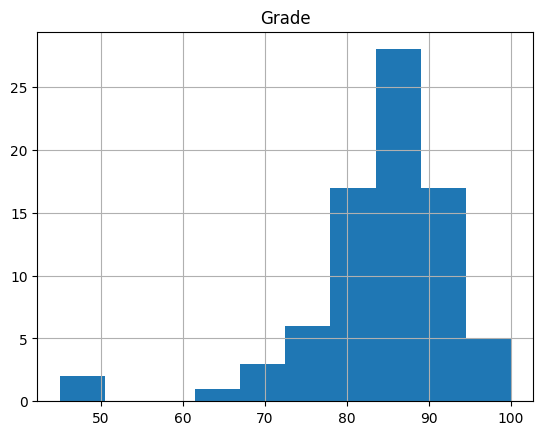

In [80]:
import seaborn as sns
df.hist()

In [81]:
df.Grade.max() - df.Grade.min()

np.float64(55.0)

array([[<Axes: title={'center': 'Grade'}>]], dtype=object)

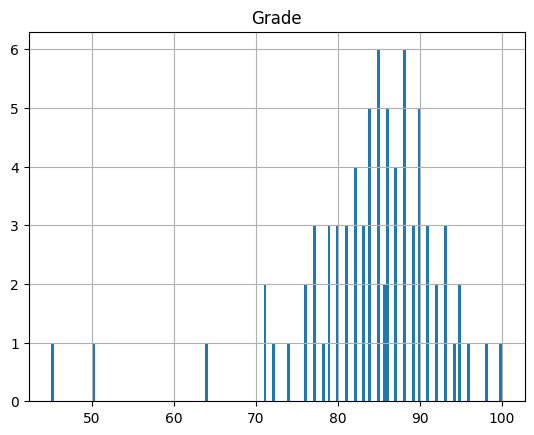

In [82]:
df.hist(bins=155)

In [83]:
import seaborn as sns

<Axes: ylabel='Count'>

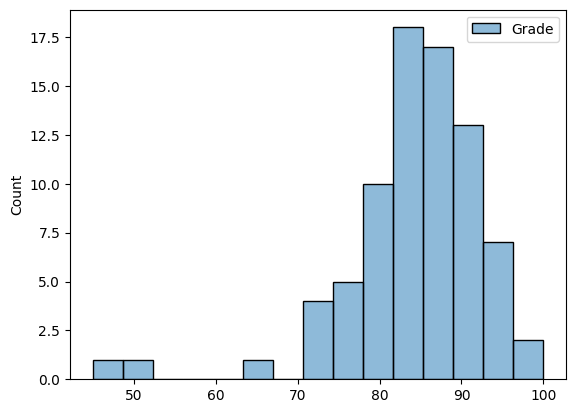

In [84]:
sns.histplot(df)

<Axes: ylabel='Count'>

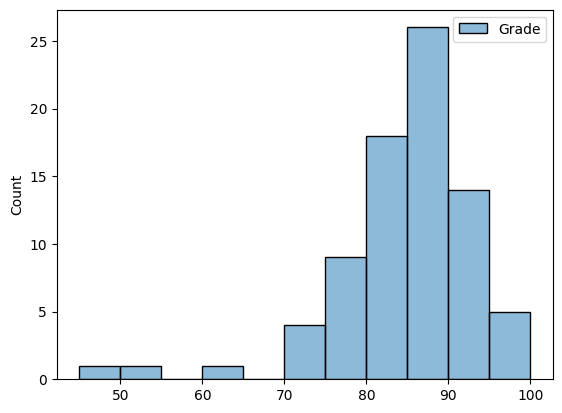

In [85]:
sns.histplot(df,binwidth=5)

<Axes: >

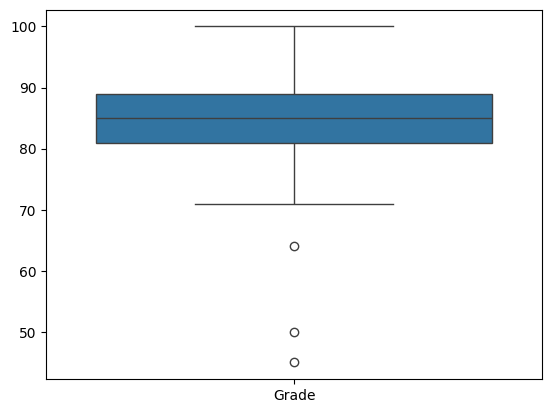

In [86]:
sns.boxplot(df)

In [87]:
import numpy as np

In [88]:
q25,q50,q75 = np.percentile(df.Grade.dropna(),(25,50,75))
q25

np.float64(81.0)

In [89]:
iqr = q75-q25

In [90]:
min_grade = q25 - 1.5 * iqr
max_grade = q75 + 1.5 * iqr

In [91]:
min_grade, q25, q50, q75, max_grade

(np.float64(69.0),
 np.float64(81.0),
 np.float64(85.0),
 np.float64(89.0),
 np.float64(101.0))

In [92]:
import numpy as np

In [93]:
mean = np.mean(df.Grade)
sd = np.std(df.Grade)

mean , sd

(np.float64(84.08987341772152), np.float64(8.723725033779411))

In [94]:
[grade for grade in df.Grade if (grade < mean - 3 * sd) or (grade > mean +  3 *  sd)]

[50.0, 45.0]

In [95]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [96]:
df.shape

(79, 4)

In [97]:
df[df.Grade < 60]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,50.0
53,Wyatt,Intro to SQL,Sophomore,45.0


In [98]:
df.drop([37,56])

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
74,Aaron,Exploratory Data Analysis,Junior,85.00
75,Charles,Exploratory Data Analysis,Junior,93.00
76,Connor,Exploratory Data Analysis,Junior,91.00
77,Riley,Exploratory Data Analysis,Junior,87.00


In [99]:
df[df['Grade']>=60]

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
74,Aaron,Exploratory Data Analysis,Junior,85.00
75,Charles,Exploratory Data Analysis,Junior,93.00
76,Connor,Exploratory Data Analysis,Junior,91.00
77,Riley,Exploratory Data Analysis,Junior,87.00


In [100]:
df[df.Grade < 60]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,50.0
53,Wyatt,Intro to SQL,Sophomore,45.0


In [101]:
min_grade = df[df.Grade >= 60]['Grade'].min()
min_grade

np.float64(64.0)

In [102]:
df.Grade = np.where(df.Grade < 60 , min_grade, df.Grade)
df.Grade.values[37]

C:\Users\hp\AppData\Local\Temp\ipykernel_11008\1580689424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Grade = np.where(df.Grade < 60 , min_grade, df.Grade)


np.float64(76.0)

In [103]:
df.loc[[37,56]]

,Student,Class,Year,Grade
37,Luke,Intro to SQL,Sophomore,76.0
56,Jack,Exploratory Data Analysis,Sophomore,84.0


In [104]:
df[df.Student == "John"]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,64.0


In [105]:
df.loc[37,'Grade'] = 74


In [106]:
df.loc[37]

Student            Luke
Class      Intro to SQL
Year          Sophomore
Grade              74.0
Name: 37, dtype: object

**Steps**

In [107]:
## missing values
## inconsistent text and typos
## duplicate data
## outliers

In [108]:
## missing values
df[df.isna().any(axis=1)]
df.dropna(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11008\3163197976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [109]:
## inconsistent text and typos
import numpy as np
df.Class = np.where(df['Class']=="Python","Intro to Python",df['Class'])
df.Class = np.where(df['Class']=="EDA","Exploratory Data Analysis",df['Class'])
df.Class.value_counts()


C:\Users\hp\AppData\Local\Temp\ipykernel_11008\2084966152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class = np.where(df['Class']=="Python","Intro to Python",df['Class'])
C:\Users\hp\AppData\Local\Temp\ipykernel_11008\2084966152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class = np.where(df['Class']=="EDA","Exploratory Data Analysis",df['Class'])


Class
Intro to Python              25
Exploratory Data Analysis    24
Intro to SQL                 18
Freshman Seminar             12
Name: count, dtype: int64

In [110]:
## duplicate data
df[df.duplicated()]
df = df.drop_duplicates()

In [111]:
## outliers
df.head()


,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [112]:
df.loc[60,'Grade'] = 100

In [113]:
df.loc[60]

Student                    Christian
Class      Exploratory Data Analysis
Year                          Junior
Grade                          100.0
Name: 60, dtype: object

<Axes: ylabel='Count'>

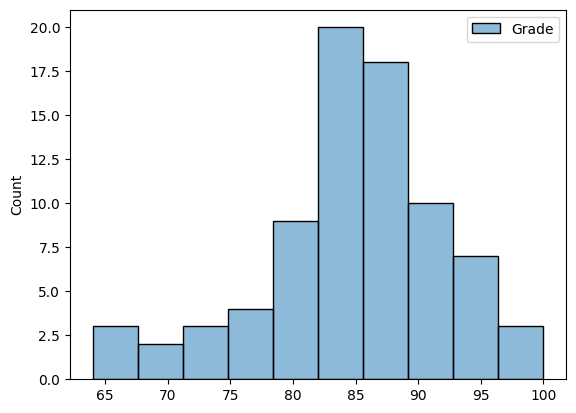

In [114]:
import seaborn as sns
sns.histplot(df)

**Creating a new column**

**Calculating Percentages**

In [115]:
groceries = pd.read_excel("./Data/Groceries.xlsx")
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15


In [116]:

groceries['New Column'] = round(groceries.Price_Dollars * 1.05,2)
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19


In [117]:
groceries['Percent Groceries'] = round((groceries['Inventory']/groceries['Inventory'].sum())*100,2)
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Percent Groceries
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,7.19
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,10.29
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4.12
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,1.03
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,3.05


In [118]:
import numpy as np
groceries['Low Inventory'] =  np.where(groceries['Inventory']<50,'low','')
groceries.head(20)

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Percent Groceries,Low Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,7.19,
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,10.29,
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4.12,
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,1.03,
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,3.05,
5,P100015,Produce: Fruit,Watermelon,5.99,99,2023-06-12 19:15:00,2023-06-15,6.29,2.04,
6,P100016,Produce: Vegetable,Cabbage,1.78,78,2023-06-12 19:25:00,2023-06-15,1.87,1.61,
7,P100017,Produce: Vegetable,Carrots,2.00,200,2023-06-12 18:05:00,2023-06-15,2.10,4.12,
8,P100018,Produce: Vegetable,Celery,1.99,50,2023-06-12 16:42:00,2023-06-15,2.09,1.03,
9,P100019,Produce: Vegetable,Cucumber,0.99,230,2023-06-12 17:47:00,2023-06-15,1.04,4.74,


In [119]:
groceries['Last_Updated'].dt.hour.astype(str) + ' hour'

0     15 hour
1     18 hour
2     17 hour
3     16 hour
4     18 hour
5     19 hour
6     19 hour
7     18 hour
8     16 hour
9     17 hour
10     7 hour
11     7 hour
12     7 hour
13     8 hour
14     8 hour
15     8 hour
16     8 hour
17    12 hour
18    12 hour
19    12 hour
20    12 hour
21    22 hour
22    22 hour
23    22 hour
24    22 hour
Name: Last_Updated, dtype: object

In [120]:
groceries['Last_Updated'].dt.year.astype(str) + ' year'

0     2023 year
1     2023 year
2     2023 year
3     2023 year
4     2023 year
5     2023 year
6     2023 year
7     2023 year
8     2023 year
9     2023 year
10    2023 year
11    2023 year
12    2023 year
13    2023 year
14    2023 year
15    2023 year
16    2023 year
17    2023 year
18    2023 year
19    2023 year
20    2023 year
21    2023 year
22    2023 year
23    2023 year
24    2023 year
Name: Last_Updated, dtype: object

In [121]:
groceries['Shipment Date DOW'] = groceries.Next_Scheduled_Shipment.dt.dayofweek
groceries.head(5)

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Percent Groceries,Low Inventory,Shipment Date DOW
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,7.19,,3
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,10.29,,3
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4.12,,3
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,1.03,,3
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,3.05,,3


In [122]:
dow_mapping = {
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4: "Friday",
    5:"Saturday",
    6:"Sunday"
}
groceries['Shipment Date DOW'] = groceries['Shipment Date DOW'].map(dow_mapping)
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Percent Groceries,Low Inventory,Shipment Date DOW
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,7.19,,Thursday
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,10.29,,Thursday
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4.12,,Thursday
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,1.03,,Thursday
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,3.05,,Thursday


In [123]:
## 1 day to the column
groceries['New_Column_Next_Scheduled_Shipment'] = groceries.Next_Scheduled_Shipment + pd.to_timedelta(1,unit="D")
groceries.loc[:, ['New_Column_Next_Scheduled_Shipment','Next_Scheduled_Shipment']].head()

,New_Column_Next_Scheduled_Shipment,Next_Scheduled_Shipment
0,2023-06-16,2023-06-15
1,2023-06-16,2023-06-15
2,2023-06-16,2023-06-15
3,2023-06-16,2023-06-15
4,2023-06-16,2023-06-15


In [124]:
groceries['New_Column_Next_Scheduled_Shipment'] = np.where(groceries['Category'] == 'Produce: Fruit', groceries.Next_Scheduled_Shipment + pd.to_timedelta(1,unit="D"), groceries.Next_Scheduled_Shipment)
groceries.loc[:,['Category','Next_Scheduled_Shipment','New_Column_Next_Scheduled_Shipment']]

,Category,Next_Scheduled_Shipment,New_Column_Next_Scheduled_Shipment
0,Produce: Fruit,2023-06-15,2023-06-16
1,Produce: Fruit,2023-06-15,2023-06-16
2,Produce: Fruit,2023-06-15,2023-06-16
3,Produce: Fruit,2023-06-15,2023-06-16
4,Produce: Fruit,2023-06-15,2023-06-16
5,Produce: Fruit,2023-06-15,2023-06-16
6,Produce: Vegetable,2023-06-15,2023-06-15
7,Produce: Vegetable,2023-06-15,2023-06-15
8,Produce: Vegetable,2023-06-15,2023-06-15
9,Produce: Vegetable,2023-06-15,2023-06-15


In [149]:
 groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Percent Groceries,Low Inventory,Shipment Date DOW,New_Column_Next_Scheduled_Shipment,Product_ID_Num,Category Type,Category Name,Organic
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,7.19,,Thursday,2023-06-16,100010,Produce,Fruit,False
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,10.29,,Thursday,2023-06-16,100011,Produce,Fruit,False
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4.12,,Thursday,2023-06-16,100012,Produce,Fruit,False
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,1.03,,Thursday,2023-06-16,100013,Produce,Fruit,False
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,3.05,,Thursday,2023-06-16,100014,Produce,Fruit,True


In [127]:
groceries['Product_ID_Num']=groceries.Product_ID.str[1:]

In [146]:
groceries.dtypes

Product_ID                                    object
Category                                      object
Item                                          object
Price_Dollars                                float64
Inventory                                      int64
Last_Updated                          datetime64[ns]
Next_Scheduled_Shipment               datetime64[ns]
New Column                                   float64
Percent Groceries                            float64
Low Inventory                                 object
Shipment Date DOW                             object
New_Column_Next_Scheduled_Shipment    datetime64[ns]
Product_ID_Num                                 int64
Category Type                                 object
Category Name                                 object
Organic                                        int64
dtype: object

In [132]:
groceries['Product_ID_Num']=groceries['Product_ID_Num'].astype(int)

In [134]:
groceries.Category.value_counts()

Category
Produce: Fruit           6
Produce: Vegetable       4
Produce: Dairy           4
Pantry: Snacks           4
Produce: Meat            3
Frozen: Frozen Snacks    2
Frozen: Frozen Fruit     2
Name: count, dtype: int64

In [136]:
groceries.Category.str.split(":").to_list()

[['Produce', ' Fruit'],
 ['Produce', ' Fruit'],
 ['Produce', ' Fruit'],
 ['Produce', ' Fruit'],
 ['Produce', ' Fruit'],
 ['Produce', ' Fruit'],
 ['Produce', ' Vegetable'],
 ['Produce', ' Vegetable'],
 ['Produce', ' Vegetable'],
 ['Produce', ' Vegetable'],
 ['Produce', ' Meat'],
 ['Produce', ' Meat'],
 ['Produce', ' Meat'],
 ['Produce', ' Dairy'],
 ['Produce', ' Dairy'],
 ['Produce', ' Dairy'],
 ['Produce', ' Dairy'],
 ['Pantry', ' Snacks'],
 ['Pantry', ' Snacks'],
 ['Pantry', ' Snacks'],
 ['Pantry', ' Snacks'],
 ['Frozen', ' Frozen Snacks'],
 ['Frozen', ' Frozen Snacks'],
 ['Frozen', ' Frozen Fruit'],
 ['Frozen', ' Frozen Fruit']]

In [142]:
groceries[['Category Type','Category Name']] =  pd.DataFrame(groceries.Category.str.split(":").to_list())

In [150]:
groceries['Organic'] =  groceries['Item'].str.lower().str.contains("organic")

In [151]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Percent Groceries,Low Inventory,Shipment Date DOW,New_Column_Next_Scheduled_Shipment,Product_ID_Num,Category Type,Category Name,Organic
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,7.19,,Thursday,2023-06-16,100010,Produce,Fruit,False
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,10.29,,Thursday,2023-06-16,100011,Produce,Fruit,False
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4.12,,Thursday,2023-06-16,100012,Produce,Fruit,False
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,1.03,,Thursday,2023-06-16,100013,Produce,Fruit,False
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,3.05,,Thursday,2023-06-16,100014,Produce,Fruit,True


In [ ]:
## reorder columns
groceris[['Product_ID','Product_ID_Num','Category','Category Type','Category Name','Item','Organic','Price_Dollars','Inventory','Low Inventory''Last_Updated','']]